In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors



In [2]:
# TIGERweb REST API URL for 2021 census tracts in Santa Barbara County
tiger_api_url = "https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb/tigerWMS_ACS2021/MapServer/8/query"

params = {
    'where': "STATE='35' AND (COUNTY='023' OR COUNTY='017' OR COUNTY='029')",  # New Mexico (35) and counties Hidalgo (023), Grant (017), and Luna (029)
    'outFields': '*',
    'outSR': '4326',  # WGS84 coordinate system
    'f': 'geojson'
}

response = requests.get(tiger_api_url, params=params)
geojson_data = response.json()

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame.from_features(geojson_data['features'])

print(gdf.head())

                                            geometry  MTFCC             OID  \
0  POLYGON ((-108.67085 33.18419, -108.67085 33.1...  G5030  20890295797483   
1  POLYGON ((-108.19243 32.87349, -108.19245 32.8...  G5030  20890295798000   
2  POLYGON ((-109.04780 32.80869, -109.04784 32.8...  G5030  20890295786707   
3  POLYGON ((-108.68884 32.60390, -108.68895 32.6...  G5030  20890295785814   
4  POLYGON ((-108.28277 32.79206, -108.28273 32.7...  G5030  20890295785266   

          GEOID STATE COUNTY   TRACT BLKGRP BASENAME           NAME LSADC  \
0  350179641001    35    017  964100      1        1  Block Group 1    BG   
1  350179641002    35    017  964100      2        2  Block Group 2    BG   
2  350179642001    35    017  964200      1        1  Block Group 1    BG   
3  350179642002    35    017  964200      2        2  Block Group 2    BG   
4  350179643003    35    017  964300      3        3  Block Group 3    BG   

  FUNCSTAT    AREALAND  AREAWATER      CENTLAT       CENTLON  

In [4]:
#gdf.to_file("nm_tracts.gpkg", driver='GPKG')


In [5]:
sb_city_path = r"C:\Users\bsf31\Documents\post-meds\data\signal\climate\NM\nm_vector.gpkg"
study_boundary = gpd.read_file(sb_city_path, layer = 'block_groups')

In [8]:
study_boundary

,MTFCC,OID,GEOID,STATE,COUNTY,TRACT,BLKGRP,BASENAME,NAME,LSADC,FUNCSTAT,AREALAND,AREAWATER,CENTLAT,CENTLON,INTPTLAT,INTPTLON,OBJECTID,geometry
0,G5030,20890295797483,350179641001,35,017,964100,1,1,Block Group 1,BG,S,2268429165,5057375,+33.0383613,-108.2858833,+33.0047128,-108.2909879,143891,"POLYGON ((-108.671 33.184, -108.671 33.184, -1..."
1,G5030,20890295798000,350179641002,35,017,964100,2,2,Block Group 2,BG,S,688226225,846479,+32.9240506,-107.9728210,+32.9206591,-107.8934945,143890,"POLYGON ((-108.192 32.873, -108.192 32.873, -1..."
2,G5030,20890295786707,350179642001,35,017,964200,1,1,Block Group 1,BG,S,2774943890,468351,+32.9174386,-108.7743090,+32.8944007,-108.7788937,143886,"POLYGON ((-109.048 32.809, -109.048 32.805, -1..."
3,G5030,20890295785814,350179642002,35,017,964200,2,2,Block Group 2,BG,S,561842946,2770410,+32.6209640,-108.4693386,+32.6335182,-108.4627188,143888,"POLYGON ((-108.689 32.604, -108.689 32.604, -1..."
4,G5030,20890295785266,350179643003,35,017,964300,3,3,Block Group 3,BG,S,3213119,0,+32.8017449,-108.2704549,+32.8017449,-108.2704549,143889,"POLYGON ((-108.283 32.792, -108.283 32.792, -1..."
5,G5030,20890295797867,350179643004,35,017,964300,4,4,Block Group 4,BG,S,914334,0,+32.7873644,-108.2724314,+32.7873644,-108.2724314,143887,"POLYGON ((-108.277 32.781, -108.277 32.780, -1..."
6,G5030,20890295798703,350179645001,35,017,964500,1,1,Block Group 1,BG,S,55348119,147251,+32.7955840,-108.1630159,+32.7894585,-108.1719754,143893,"POLYGON ((-108.212 32.830, -108.212 32.830, -1..."
7,G5030,20890295785398,350179645002,35,017,964500,2,2,Block Group 2,BG,S,3042496,28620,+32.7766611,-108.1430561,+32.7748151,-108.1430823,143892,"POLYGON ((-108.154 32.774, -108.154 32.773, -1..."
8,G5030,208903717190670,350179648001,35,017,964800,1,1,Block Group 1,BG,S,2649146149,4058593,+32.2769707,-108.3432863,+32.2661653,-108.3482580,139469,"POLYGON ((-108.538 32.118, -108.538 32.117, -1..."
9,G5030,20890295798123,350179643001,35,017,964300,1,1,Block Group 1,BG,S,16849567,12371,+32.7826881,-108.3089412,+32.7877522,-108.3157773,143894,"POLYGON ((-108.332 32.775, -108.332 32.775, -1..."


In [6]:
study_boundary.columns

Index(['MTFCC', 'OID', 'GEOID', 'STATE', 'COUNTY', 'TRACT', 'BLKGRP',
       'BASENAME', 'NAME', 'LSADC', 'FUNCSTAT', 'AREALAND', 'AREAWATER',
       'CENTLAT', 'CENTLON', 'INTPTLAT', 'INTPTLON', 'OBJECTID', 'geometry'],
      dtype='object')

In [7]:
# Extract tract numbers from your study boundary
tract_list = study_boundary['TRACT'].tolist()

In [9]:
host = 'https://api.census.gov/data'
year = '/2021'  # Using 2021 as it's the most recent 5-year ACS data
dataset_acronym = '/acs/acs5'
g = '?get='
usr_key = f"&key={'45d7e3e9cc2bd0eebda02617f4cd5a33f4676b45'}"

variables = [
    'NAME',  # Area name
    'B01003_001E',  # Total population
    'B17001_002E',  # Population below poverty level
    'B23025_005E',  # Unemployed population
    'B02001_002E',  # White population
    'B02001_003E',  # Black population
    'B02001_004E',  # American Indian and Alaska Native population
    'B02001_005E',  # Asian population
    'B03002_012E',  # Hispanic or Latino population
    'B19013_001E',  # Median household income
]

In [8]:
""" # Santa Barbara County FIPS code is 083, California state code is 06
location = '&for=tract:*&in=state:06+county:083'
# Construct the query URL
variables_str = ','.join(variables)
query_url = f"{host}{year}{dataset_acronym}{g}{variables_str}{location}{usr_key}"

# Make the API request
response = requests.get(query_url)
data = response.json()
df = pd.DataFrame(data[1:], columns=data[0])

# Calculate percentages and rates
df['Poverty Rate'] = (df['B17001_002E'].astype(int) / df['B01003_001E'].astype(int)) * 100
df['Unemployment Rate'] = (df['B23025_005E'].astype(int) / df['B01003_001E'].astype(int)) * 100
df['White %'] = (df['B02001_002E'].astype(int) / df['B01003_001E'].astype(int)) * 100
df['Black %'] = (df['B02001_003E'].astype(int) / df['B01003_001E'].astype(int)) * 100
df['American Indian and Alaska Native %'] = (df['B02001_004E'].astype(int) / df['B01003_001E'].astype(int)) * 100
df['Asian %'] = (df['B02001_005E'].astype(int) / df['B01003_001E'].astype(int)) * 100

# Select and rename columns for final output
final_df = df[['NAME', 'B01003_001E', 'Poverty Rate', 'Unemployment Rate', 'White %', 'Black %', 
               'American Indian and Alaska Native %', 'Asian %', 'B19013_001E', 'tract']]
final_df.columns = ['Tract Name', 'Population', 'Poverty Rate', 'Unemployment Rate', 'White %', 'Black %', 
                    'American Indian and Alaska Native %', 'Asian %', 'Median Household Income', 'Tract Code']

print(final_df)

# Merge geographic and demographic data
gdf['GEOID'] = gdf['STATE'] + gdf['COUNTY'] + gdf['TRACT']
merged_gdf = gdf.merge(final_df, left_on='GEOID', right_on='Tract Code', how='left')

# Now merged_gdf contains both geographic and demographic information
print(merged_gdf.head())
 """

' # Santa Barbara County FIPS code is 083, California state code is 06\nlocation = \'&for=tract:*&in=state:06+county:083\'\n# Construct the query URL\nvariables_str = \',\'.join(variables)\nquery_url = f"{host}{year}{dataset_acronym}{g}{variables_str}{location}{usr_key}"\n\n# Make the API request\nresponse = requests.get(query_url)\ndata = response.json()\ndf = pd.DataFrame(data[1:], columns=data[0])\n\n# Calculate percentages and rates\ndf[\'Poverty Rate\'] = (df[\'B17001_002E\'].astype(int) / df[\'B01003_001E\'].astype(int)) * 100\ndf[\'Unemployment Rate\'] = (df[\'B23025_005E\'].astype(int) / df[\'B01003_001E\'].astype(int)) * 100\ndf[\'White %\'] = (df[\'B02001_002E\'].astype(int) / df[\'B01003_001E\'].astype(int)) * 100\ndf[\'Black %\'] = (df[\'B02001_003E\'].astype(int) / df[\'B01003_001E\'].astype(int)) * 100\ndf[\'American Indian and Alaska Native %\'] = (df[\'B02001_004E\'].astype(int) / df[\'B01003_001E\'].astype(int)) * 100\ndf[\'Asian %\'] = (df[\'B02001_005E\'].astype(int)

In [ ]:
# Construct the query URL
variables_str = ','.join(variables)

# Initialize an empty list to store results
results = []

# Make API requests for each tract
for tract in tract_list:
    location = f'&for=tract:{tract}&in=state:06+county:083'
    query_url = f"{host}{year}{dataset_acronym}{g}{variables_str}{location}{usr_key}"
    
    response = requests.get(query_url)
    data = response.json()
    
    # Add the data for this tract to our results
    if len(data) > 1:  # Ensure we got data back
        results.extend(data[1:])  # Skip the header row

In [14]:
# Construct the query URL
variables_str = ','.join(variables)

# Initialize an empty list to store results
results = []

# Make API requests for each tract
for tract in tract_list:
    location = f'&for=tract:{tract}&in=state:06+county:083'
    query_url = f"{host}{year}{dataset_acronym}{g}{variables_str}{location}{usr_key}"
    
    response = requests.get(query_url)
    
    # Check if the request was successful
    if response.status_code != 200:
        print(f"Request failed with status code {response.status_code}")
        print(f"Response text: {response.text}")  # Optionally, print the response text
    else:
        try:
            data = response.json()
        except requests.exceptions.JSONDecodeError:
            print("Failed to parse JSON response")
            print(f"Response text: {response.text}")
    
    # Add the data for this tract to our results
    if len(data) > 1:  # Ensure we got data back
        results.extend(data[1:])  # Skip the header row




Request failed with status code 204
Response text: 


NameError: name 'data' is not defined

In [10]:
# Convert to DataFrame
df = pd.DataFrame(results, columns=variables + ['state', 'county', 'tract'])

# Calculate percentages and rates
df['Poverty Rate'] = (df['B17001_002E'].astype(int) / df['B01003_001E'].astype(int)) * 100
df['Unemployment Rate'] = (df['B23025_005E'].astype(int) / df['B01003_001E'].astype(int)) * 100
df['White %'] = (df['B02001_002E'].astype(int) / df['B01003_001E'].astype(int)) * 100
df['Black %'] = (df['B02001_003E'].astype(int) / df['B01003_001E'].astype(int)) * 100
df['American Indian and Alaska Native %'] = (df['B02001_004E'].astype(int) / df['B01003_001E'].astype(int)) * 100
df['Asian %'] = (df['B02001_005E'].astype(int) / df['B01003_001E'].astype(int)) * 100
df['Hispanic %'] = (df['B03002_012E'].astype(int) / df['B01003_001E'].astype(int)) * 100
# Select and rename columns for final output
final_df = df[['NAME', 'B01003_001E', 'Poverty Rate', 'Unemployment Rate', 'White %', 'Black %', 
               'American Indian and Alaska Native %', 'Asian %', 'Hispanic %', 'B19013_001E', 'tract']]
final_df.columns = ['Tract Name', 'Population', 'Poverty Rate', 'Unemployment Rate', 'White %', 'Black %', 
                    'American Indian and Alaska Native %', 'Asian %', 'Hispanic %', 'Median Household Income', 'Tract Code']

In [11]:
# Merge with the original GeoDataFrame to include geometry
merged_gdf = study_boundary.merge(final_df, left_on='TRACT', right_on='Tract Code')

print(merged_gdf.head())


   OBJECTID  AREALAND  ALANDHIST  AREAWATER  AWATERHIST BLKGRP COUNTY  \
0      7964    465589        NaN          0         NaN      4    083   
1    137911    761154   773447.0          0         0.0      1    083   
2    137911    761154   773447.0          0         0.0      1    083   
3    137911    761154   773447.0          0         0.0      1    083   
4    137911    761154   773447.0          0         0.0      1    083   

   EFFDATE  ESTABDATE FUNCSTAT  ... Population Poverty Rate Unemployment Rate  \
0      NaN        NaN        S  ...       6098     8.576582          2.263037   
1      NaN        NaN        S  ...       4723     9.421978          1.164514   
2      NaN        NaN        S  ...       4723     9.421978          1.164514   
3      NaN        NaN        S  ...       4723     9.421978          1.164514   
4      NaN        NaN        S  ...       4723     9.421978          1.164514   

     White %   Black % American Indian and Alaska Native %   Asian %  \
0 

In [12]:
merged_gdf['Median Household Income'] = pd.to_numeric(merged_gdf['Median Household Income'], errors='coerce')
merged_gdf['Population'] = pd.to_numeric(merged_gdf['Population'], errors='coerce')



In [13]:
# Save as GeoPackage
merged_gdf.to_file(sb_city_path, driver="GPKG", layer="tracts_with_data")

In [14]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [15]:
# Set up the plotting style


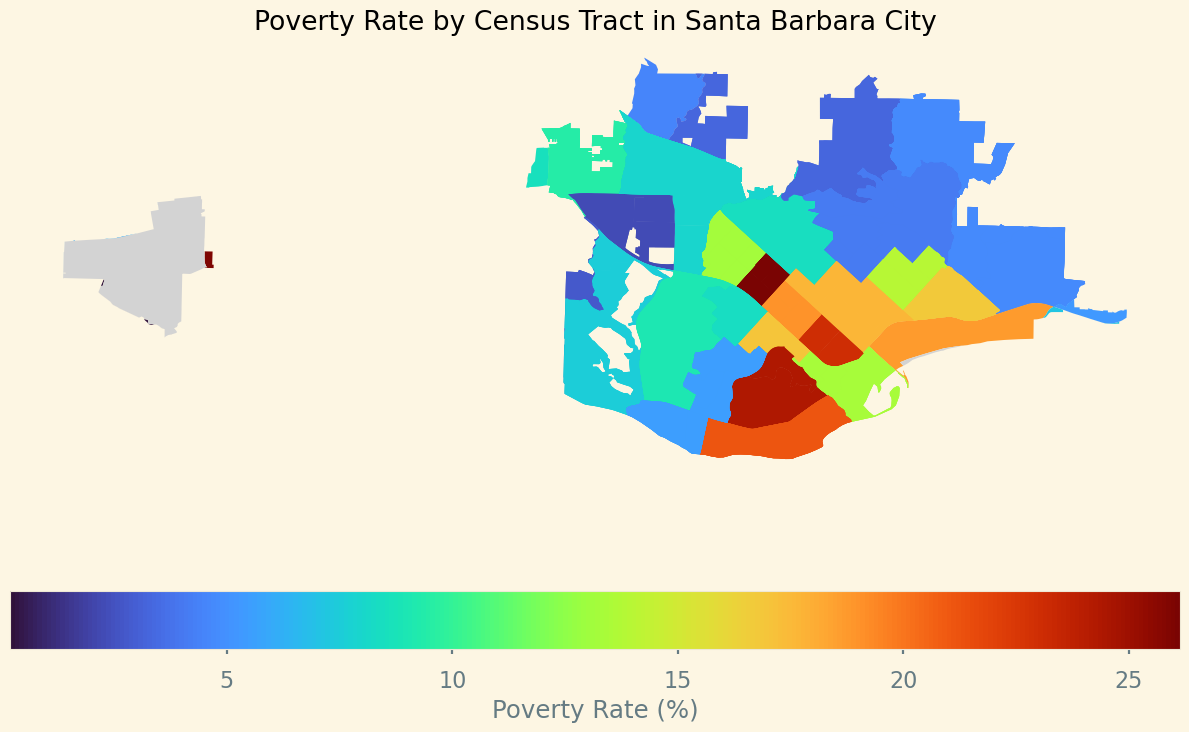

In [16]:
plt.style.use('Solarize_Light2')
plt.style.use('seaborn-v0_8-poster')
# 1. Choropleth map of Poverty Rate
fig, ax = plt.subplots(figsize=(12, 8))
merged_gdf.plot(column='Poverty Rate', ax=ax, legend=True, 
                legend_kwds={'label': 'Poverty Rate (%)', 'orientation': 'horizontal'},
                cmap='turbo', missing_kwds={'color': 'lightgrey'})
ax.set_title('Poverty Rate by Census Tract in Santa Barbara City')
ax.axis('off')
plt.tight_layout()


#plt.savefig('santa_barbara_median_income.png', dpi=300, bbox_inches='tight')


In [17]:

# Filter out negative and unrealistic high values
valid_income_mask = (merged_gdf['Median Household Income'] >= 0) & (merged_gdf['Median Household Income'] <= 2000000)
invalid_income_mask = ~valid_income_mask

# Drop rows with NaN values in the 'Median Household Income' column
merged_gdf_valid = merged_gdf[valid_income_mask].dropna(subset=['Median Household Income'])

# Check min and max values
min_income = merged_gdf_valid['Median Household Income'].min()
max_income = merged_gdf_valid['Median Household Income'].max()
print(f"Min: {min_income}, Max: {max_income}")

Min: 47089, Max: 216528


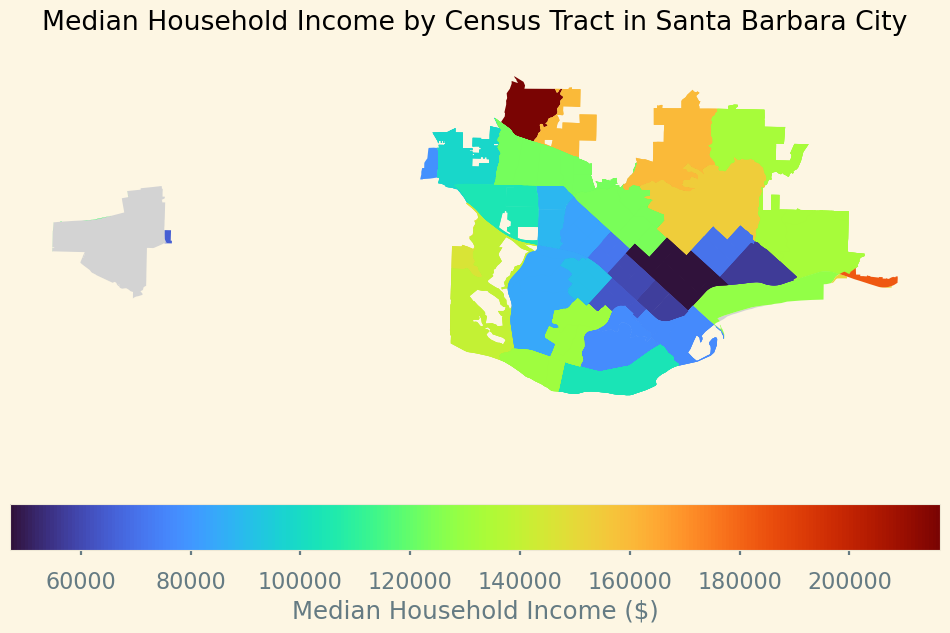

In [18]:
# 2. Choropleth map of Median Household Income
fig, ax = plt.subplots(figsize=(12, 8))

# Plot invalid data (e.g., areas without households) with a different color
if invalid_income_mask.any():
    merged_gdf_invalid = merged_gdf[invalid_income_mask]
    merged_gdf_invalid.plot(ax=ax, color='lightgrey', legend=True)
    
merged_gdf_valid.plot(column='Median Household Income', ax=ax, legend=True, 
                cmap='turbo', missing_kwds={'color': 'lightgrey'},
                legend_kwds={'label': 'Median Household Income ($)', 'orientation': 'horizontal'})

ax.set_title('Median Household Income by Census Tract in Santa Barbara City')
ax.axis('off')


plt.show()
#plt.savefig('santa_barbara_median_income.png', dpi=300, bbox_inches='tight')
#plt.close()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot valid data
merged_gdf_valid.plot(column='Median Household Income', ax=ax, cmap='viridis', 
                      missing_kwds={'color': 'lightgrey'}, legend=True)

# Plot invalid data (e.g., areas without households) with a different color
if invalid_income_mask.any():
    merged_gdf_invalid = merged_gdf[invalid_income_mask]
    merged_gdf_invalid.plot(ax=ax, color='lightgrey', legend=True)

# Add the title and remove the axis
ax.set_title('Median Household Income by Census Tract in Santa Barbara City')
ax.axis('off')

# Manually create a colorbar for the valid data
norm = colors.Normalize(vmin=min_income, vmax=max_income)
sm = cm.ScalarMappable(cmap='viridis', norm=norm)

plt.show()

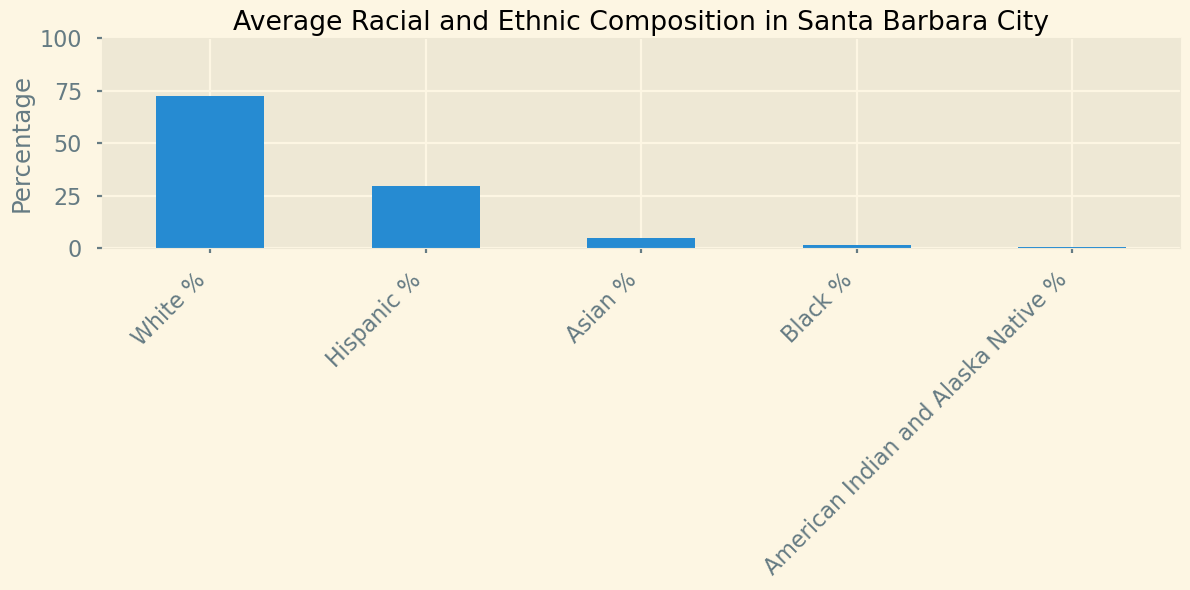

In [20]:
# 3. Bar plot of racial composition
racial_data = merged_gdf[['White %', 'Black %', 'American Indian and Alaska Native %', 'Asian %', 'Hispanic %']]
racial_mean = racial_data.mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
racial_mean.plot(kind='bar', ax=ax)
ax.set_title('Average Racial and Ethnic Composition in Santa Barbara City')
ax.set_ylabel('Percentage')
ax.set_ylim(0, 100)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.savefig('santa_barbara_racial_ethnic_composition.png', dpi=300, bbox_inches='tight')
#plt.close()


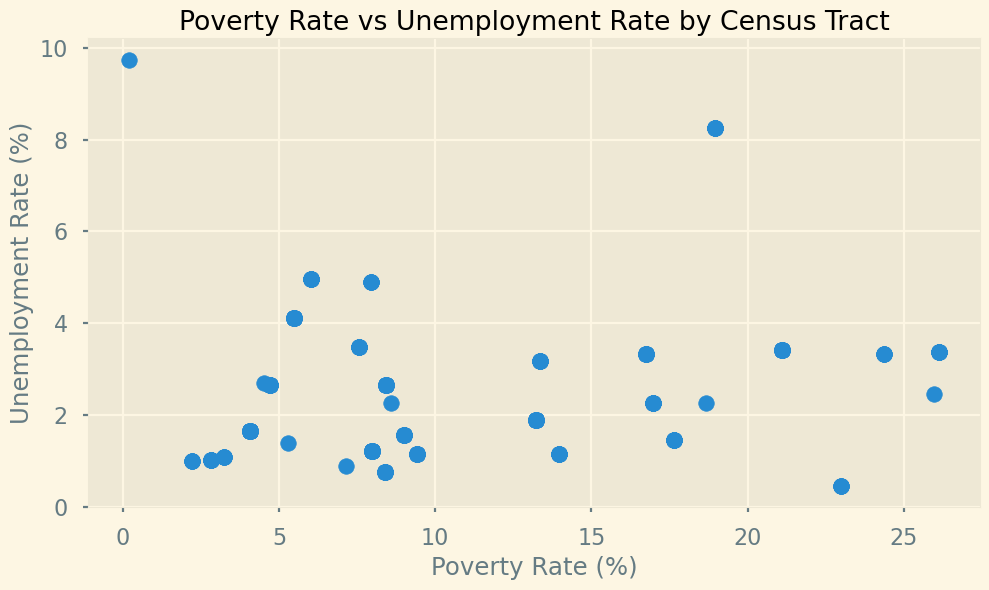

In [21]:
# 4. Scatter plot of Poverty Rate vs Unemployment Rate
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(merged_gdf['Poverty Rate'], merged_gdf['Unemployment Rate'])
ax.set_xlabel('Poverty Rate (%)')
ax.set_ylabel('Unemployment Rate (%)')
ax.set_title('Poverty Rate vs Unemployment Rate by Census Tract')
plt.tight_layout()
#plt.savefig('santa_barbara_poverty_vs_unemployment.png', dpi=300, bbox_inches='tight')
#plt.close()


In [22]:
# Print the summary statistics to understand the data
print(merged_gdf['Population'].describe())


count     362.000000
mean     4468.939227
std      1055.215461
min         0.000000
25%      3511.000000
50%      4675.000000
75%      5475.000000
max      7196.000000
Name: Population, dtype: float64


In [23]:
# Check min and max values
min_population = merged_gdf['Population'].min()
max_population = merged_gdf['Population'].max()
print(f"Min: {min_population}, Max: {max_population}")

Min: 0, Max: 7196


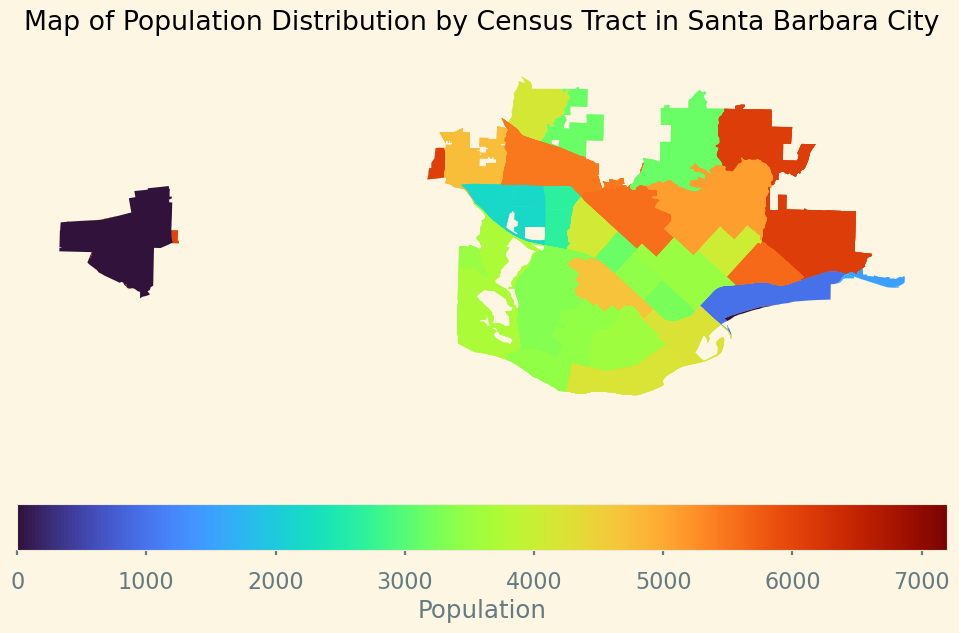

In [24]:
fig, ax = plt.subplots(figsize=(12, 8))


# Plot valid data
merged_gdf.plot(column='Population', ax=ax, legend=True, 
                      cmap='turbo', missing_kwds={'color': 'lightgrey'},
                      legend_kwds={'label': 'Population', 'orientation': 'horizontal'})

# Add the title and remove the axis
ax.set_title('Map of Population Distribution by Census Tract in Santa Barbara City')
ax.axis('off')

plt.show()
